# Data preprocessing and Exploratory Data Analysis (EDA)

In [1]:
#all necessary imports
import pandas as pd
import pandasql as ps
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Fetching rides data

In [14]:
rides = pd.read_csv('data/cab_rides.csv')

## Initial exploration of the rides dataset

In [15]:
print(rides.head(10))

   distance cab_type     time_stamp              destination  \
0      0.44     Lyft  1544952607890            North Station   
1      0.44     Lyft  1543284023677            North Station   
2      0.44     Lyft  1543366822198            North Station   
3      0.44     Lyft  1543553582749            North Station   
4      0.44     Lyft  1543463360223            North Station   
5      0.44     Lyft  1545071112138            North Station   
6      1.08     Lyft  1543208580200  Northeastern University   
7      1.08     Lyft  1543780384677  Northeastern University   
8      1.08     Lyft  1543818482645  Northeastern University   
9      1.08     Lyft  1543315522249  Northeastern University   

             source  price  surge_multiplier  \
0  Haymarket Square    5.0               1.0   
1  Haymarket Square   11.0               1.0   
2  Haymarket Square    7.0               1.0   
3  Haymarket Square   26.0               1.0   
4  Haymarket Square    9.0               1.0   
5  Haym

In [16]:
print(rides.shape)

(693071, 10)


In [17]:
print(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 37.0+ MB
None


In [18]:
print(rides.describe())


            distance    time_stamp          price  surge_multiplier
count  693071.000000  6.930710e+05  637976.000000     693071.000000
mean        2.189430  1.544046e+12      16.545125          1.013870
std         1.138937  6.891925e+08       9.324359          0.091641
min         0.020000  1.543204e+12       2.500000          1.000000
25%         1.280000  1.543444e+12       9.000000          1.000000
50%         2.160000  1.543737e+12      13.500000          1.000000
75%         2.920000  1.544828e+12      22.500000          1.000000
max         7.860000  1.545161e+12      97.500000          3.000000


## Fetching weather data

In [19]:
weather = pd.read_csv('data/weather.csv')

## Initial exploration of the rides dataset

In [20]:
print(weather.head(10))

    temp                 location  clouds  pressure    rain  time_stamp  \
0  42.42                 Back Bay     1.0   1012.14  0.1228  1545003901   
1  42.43              Beacon Hill     1.0   1012.15  0.1846  1545003901   
2  42.50        Boston University     1.0   1012.15  0.1089  1545003901   
3  42.11                   Fenway     1.0   1012.13  0.0969  1545003901   
4  43.13       Financial District     1.0   1012.14  0.1786  1545003901   
5  42.34         Haymarket Square     1.0   1012.15  0.2068  1545003901   
6  42.36                North End     1.0   1012.15  0.2088  1545003901   
7  42.21            North Station     1.0   1012.16  0.2069  1545003901   
8  42.07  Northeastern University     1.0   1012.12  0.1020  1545003901   
9  43.05            South Station     1.0   1012.12  0.1547  1545003901   

   humidity   wind  
0      0.77  11.25  
1      0.76  11.32  
2      0.76  11.07  
3      0.77  11.09  
4      0.75  11.49  
5      0.77  11.49  
6      0.77  11.46  
7     

In [21]:
print(weather.shape)

(6276, 8)


In [22]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 367.8+ KB
None


In [23]:
print(weather.describe())

              temp       clouds     pressure        rain    time_stamp  \
count  6276.000000  6276.000000  6276.000000  894.000000  6.276000e+03   
mean     39.090475     0.677777  1008.445209    0.057652  1.543857e+09   
std       6.022055     0.314284    12.870775    0.100758  6.659340e+05   
min      19.620000     0.000000   988.250000    0.000200  1.543204e+09   
25%      36.077500     0.440000   997.747500    0.004900  1.543387e+09   
50%      40.130000     0.780000  1007.660000    0.014850  1.543514e+09   
75%      42.832500     0.970000  1018.480000    0.060925  1.544691e+09   
max      55.410000     1.000000  1035.120000    0.780700  1.545159e+09   

          humidity         wind  
count  6276.000000  6276.000000  
mean      0.763985     6.802812  
std       0.127340     3.633466  
min       0.450000     0.290000  
25%       0.670000     3.517500  
50%       0.760000     6.570000  
75%       0.890000     9.920000  
max       0.990000    18.180000  


## Merging ride and weather data

In [24]:
rides['time_stamp_secs'] = rides['time_stamp'].div(1000).round(-1) #turning into seconds from miliseconds
rides['time_stamp_secs'] = rides['time_stamp_secs'].astype(int)
weather['time_stamp_round'] = weather['time_stamp'].round(-1)
#print(sorted(rides.time_stamp_secs.unique()))
#print(sorted(weather.time_stamp_round.unique()))

#failed attempts with pandas merge
#combined_data =  rides.merge( weather,how='inner', left_on=["time_stamp_secs", "source"], right_on=["time_stamp_round", "location"])
#combined_data2 =  rides.merge( weather,how='inner', left_on="time_stamp_secs", right_on="time_stamp_round")

#I'm making a range because weather data and rides data were created in different intervals (we want the weather timestamp closest to the ride timestamp)
sql_query = "SELECT * FROM rides INNER JOIN weather ON rides.source = weather.location WHERE time_stamp_round  <= (rides.time_stamp_secs +1800) AND time_stamp_round >= ( rides.time_stamp_secs-1800)"
new_combined = ps.sqldf(sql_query, locals())
new_combined.to_csv('data/combined.csv')
#This data might some duplicates because they way we are merging -> we need to remove them

MemoryError: Unable to allocate 98.8 MiB for an array with shape (1295103, 20) and data type object

In [25]:
combined_data = pd.read_csv('data/combined.csv')
print(combined_data.shape) #more rows than in rides, we have some duplicates

MemoryError: Unable to allocate 9.88 MiB for an array with shape (1295103,) and data type float64

In [ ]:
cleaned_data = combined_data.drop_duplicates(subset=['id'])
print(cleaned_data.shape)
cleaned_data.drop(cleaned_data[cleaned_data['price'].isnull()].index, inplace = True)
print(cleaned_data.shape)

In [17]:
cleaned_data = pd.read_csv('data/cleaned.csv')

#replacing cab type with numerical ( Uber === 1, Lyft == 2 )
cleaned_data['cab_type'].replace(['Uber'], 1, inplace=True)
cleaned_data['cab_type'].replace(['Lyft'], 2, inplace=True)

conditions = [
    (cleaned_data.name == "Shared") | (cleaned_data.name == "UberPool" ),
    (cleaned_data.product_id == "lyft") | (cleaned_data.name == "UberX"),
    (cleaned_data.product_id == "lyft_plus") | (cleaned_data.name == "UberXL"),
    (cleaned_data.product_id == "lyft_premier") | (cleaned_data.product_id == "lyft_lux") | (cleaned_data.product_id == "lyft_luxsuv") | (cleaned_data.name == "Black") | (cleaned_data.name == "Black SUV")
]

values = [1, 2, 3, 4] # 1 = shared rides, 2 = normal rides, 3 = XL rides, 4 = luxury rides, 0 = else (WAV)
cleaned_data['ride_class'] = np.select(conditions, values)

cleaned_data['ride_time'] = pd.to_datetime(cleaned_data.time_stamp_round, unit='s')
#cleaned_data['ride_time'] = cleaned_data['ride_time'].dt.time
cleaned_data['ride_time_mins'] = cleaned_data['ride_time'].dt.hour*60 + cleaned_data['ride_time'].dt.minute

cleaned_data.to_csv('data/cleaned.csv', index=False)

c:\users\a_sta\onedrive - worcester polytechnic institute (wpi.edu)\2020-21\d\ds 3010\final project\ds3010project\new_venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


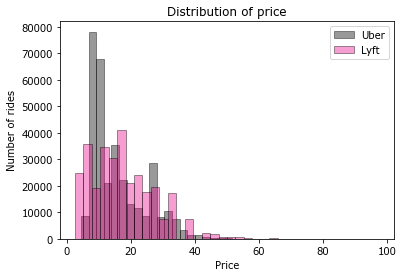

In [10]:

#rides = pd.read_csv("data/cab_rides.csv")
cleaned_data = pd.read_csv("data/cleaned.csv")
#combined_data = pd.read_csv('data/combined.csv')

#plt.hist(cleaned_data['price'], color = 'blue', edgecolor = 'black',
   #      bins = int(180/5))

#sns.distplot(cleaned_data['price'], hist=True, kde=False,
 # #           bins=int(180/5), color = 'blue',
            # hist_kws={'edgecolor':'black'})

#plt.title('Distribution of price')
#plt.xlabel('Price')
#plt.ylabel('Number of rides')
#plt.show()

uber_rides = cleaned_data[cleaned_data['cab_type'] == 1]
lyft_rides = cleaned_data[cleaned_data['cab_type'] == 2]


sns.distplot(uber_rides['price'], hist=True, kde=False,
             bins=int(180/5), color = 'black',
             hist_kws={'edgecolor':'black'}, label="Uber")
sns.distplot(lyft_rides['price'], hist=True, kde=False,
             bins=int(180/5), color = '#ea0b8d',
             hist_kws={'edgecolor':'black'}, label="Lyft")
plt.legend()
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Number of rides')
plt.show()

c:\users\a_sta\onedrive - worcester polytechnic institute (wpi.edu)\2020-21\d\ds 3010\final project\ds3010project\new_venv\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\a_sta\onedrive - worcester polytechnic institute (wpi.edu)\2020-21\d\ds 3010\final project\ds3010project\new_venv\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


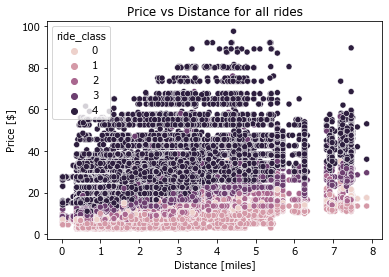

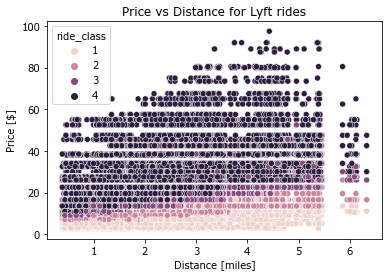

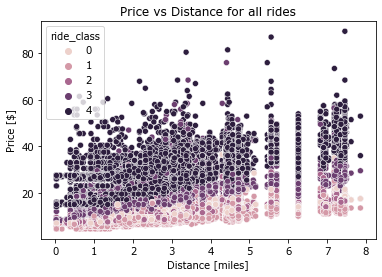

In [19]:
sns.scatterplot(data=cleaned_data, x="distance", y="price", hue="ride_class")
plt.title('Price vs Distance for all rides')
plt.xlabel('Distance [miles]')
plt.ylabel('Price [$]')
plt.show()

sns.scatterplot(data=lyft_rides, x="distance", y="price", hue="ride_class")
plt.title('Price vs Distance for Lyft rides')
plt.xlabel('Distance [miles]')
plt.ylabel('Price [$]')
plt.show()

sns.scatterplot(data=uber_rides, x="distance", y="price", hue="ride_class")
plt.title('Price vs Distance for Uber rides')
plt.xlabel('Distance [miles]')
plt.ylabel('Price [$]')
plt.show()

In [10]:
print(cleaned_data.product_id.unique())
print(cleaned_data.name.unique())
print(cleaned_data.cab_type.unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']
[2 1]
